**Корректность проверена на Python 3.6:**
+ pandas 0.23.4
+ numpy 1.15.4
+ matplotlib 3.0.2
+ seaborn 0.9.0

# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# vibo: для выполнения п.9 дополнительно импортируем scipy, optimize
import scipy
from scipy import optimize

In [2]:
# vibo: проверка текущей версии python и версий установленных библиотек
from platform import python_version
print('python', python_version(),'\npandas', pd.__version__, '\nnumpy', np.__version__, 
      '\nmatplotlib', matplotlib.__version__, '\nseaborn', sns.__version__, '\nscipy', scipy.__version__)

python 3.8.3 
pandas 1.0.5 
numpy 1.18.5 
matplotlib 3.2.2 
seaborn 0.10.1 
scipy 1.5.0


In [3]:
# vibo: корректность работы проверена для:
# python 3.8.3 
# pandas 1.0.5 
# numpy 1.18.5 
# matplotlib 3.2.2 
# seaborn 0.10.1 
# scipy 1.5.0

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [4]:
data = pd.read_csv('/home/vibo/vNotebook/MIPT_2020/course2/week1/my_ex/ex1/weights_heights.csv', index_col='Index')

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

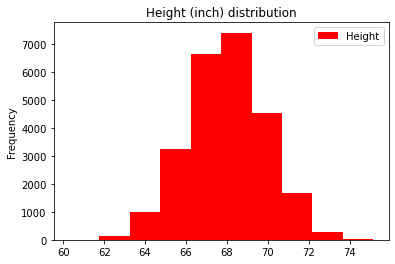

In [5]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [6]:
# vibo: просмотр первых 5 записей
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Text(0, 0.5, 'Frequency')

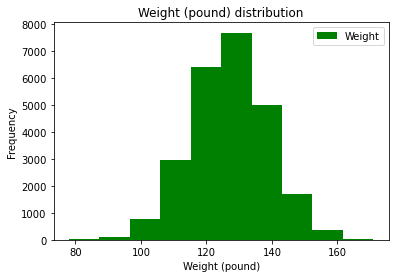

In [7]:
# vibo: нарисуем гистограмму распределения веса
data.plot(y='Weight', kind='hist', color='green', title='Weight (pound) distribution')
plt.xlabel('Weight (pound)')
plt.ylabel('Frequency')

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [8]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [9]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

In [10]:
# vibo: обновим первые 5 записей для проверки результата добавления нового столбца
data.head(5)

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


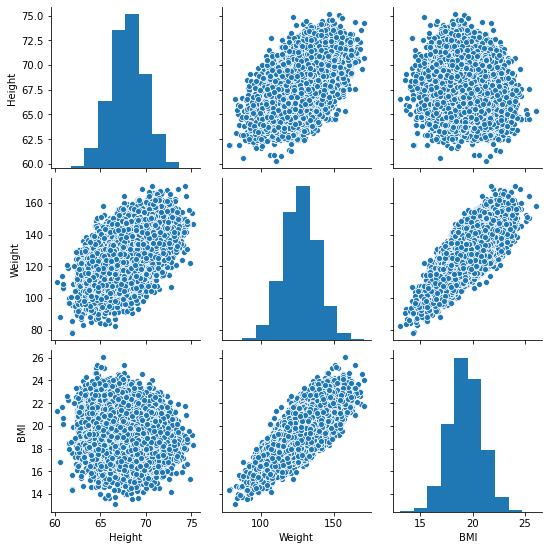

In [11]:
# vibo: визуализируем данные методом pairplot из библиотеки seaborn 
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8946d9d9d0>,
      dtype=object)

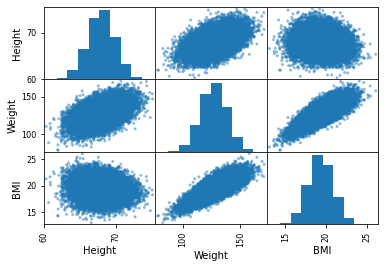

In [12]:
# vibo: визуализируем данные методом scatter_matrix из библиотеки pandas 
pd.plotting.scatter_matrix(data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

In [13]:
# vibo: создадим функцию для нового категориального признака (три группы по весу)
def weight_category(weight):
#    pass (vibo: оператор полезен, когда вы не пишете реализацию функции, но хотите реализовать ее в будущем)
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

# vibo: добавим новый столбец методом apply Pandas DataFrame 
data['weight_cat'] = data['Weight'].apply(weight_category)

# vibo: также можно это сделать через lambda-функцию
data['weight_cat_new'] = data.apply(lambda row: weight_category(row['Weight']), axis=1)

# vibo: проверим результат добавления нового столбца
data.head(5)

,Height,Weight,BMI,weight_cat,weight_cat_new
Index,,,,,
1,65.78331,112.9925,18.357573,1,1
2,71.51521,136.4873,18.762577,2,2
3,69.39874,153.0269,22.338895,3,3
4,68.21660,142.3354,21.504526,2,2
5,67.78781,144.2971,22.077581,2,2


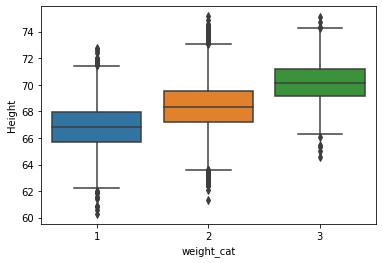

In [14]:
# vibo: построим "ящик с усами" (boxplot), демонстрирующий зависимость роста от весовой категории:
# vibo: используем метод boxplot библиотеки Seaborn
sns.boxplot(data=data, x='weight_cat', y='Height')

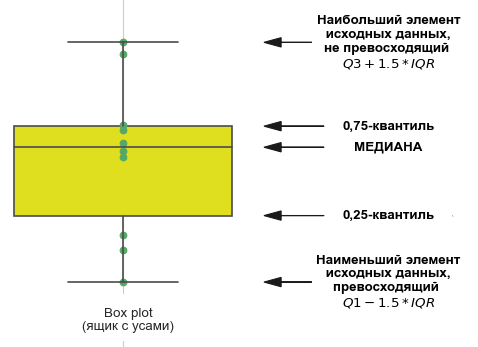

In [15]:
# vibo: первоисточник https://habr.com/ru/post/533726/
from IPython.display import Image
Image("pic1.png", width=400, height=400)

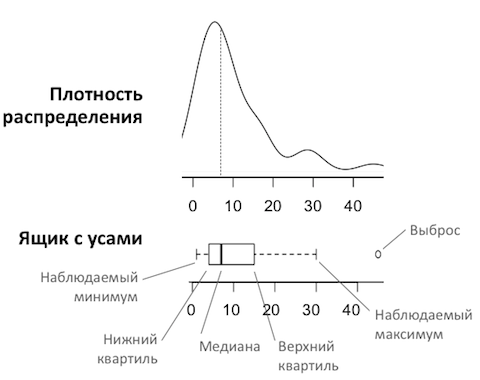

In [16]:
# vibo: первоисточник https://ru.wikipedia.org/
#Ящик с усами, диаграмма размаха (англ. box-and-whiskers diagram or plot, box plot) — график, использующийся 
#в описательной статистике, компактно изображающий одномерное распределение вероятностей.
#Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили,
#минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, 
#чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, 
#так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса
#(дисперсии) и асимметрии данных и выявить выбросы. 
from IPython.display import Image
Image("pic2.png", width=400, height=400)

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

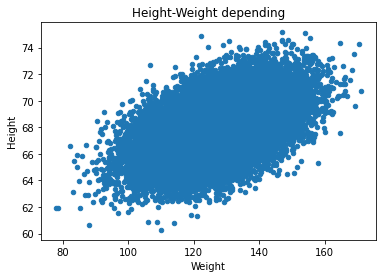

In [17]:
# vibo: строим scatter plot зависимости роста от веса
data.plot(y='Height', x='Weight', kind='scatter', title='Height-Weight depending')

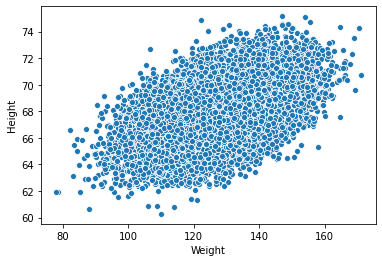

In [18]:
# vibo: аналогично зависимость роста от веса можно построить в seborn
sns.scatterplot(data=data, x='Weight', y='Height')

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [19]:
# vibo: функция вычисления квадратичной ошибки приближения зависимости роста (y) от веса (x)
# vibo: на вход функции подаются два параметра wo и w1
def sq_error(w0, w1):
    n = len(data.index) # v: определяем число наблюдений в наборе данных
    summ_n = 0
    x = data['Weight']
    y = data['Height']
    for i in range(1,n):
        summ_n += (y[i] - (w0 + w1 * x[i]))**2
    return summ_n

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

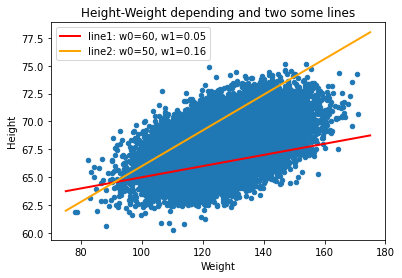

In [20]:
# vibo: строим две произвольные линии на облаке точек пространства признаков рост/вес
data.plot(y='Height',x='Weight', kind='scatter', title='Height-Weight depending and two some lines')

line_x = np.linspace(start=75, stop=175, num=50)
line1_y = 60 + 0.05 * line_x
line2_y = 50 + 0.16 * line_x

plt.plot(line_x, line1_y, lw=2, color='red', label='line1: w0=60, w1=0.05')
plt.plot(line_x, line2_y, lw=2, color='orange', label='line2: w0=50, w1=0.16')
plt.legend()


Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

Text(0, 0.5, 'Error(w0=50,w1)')

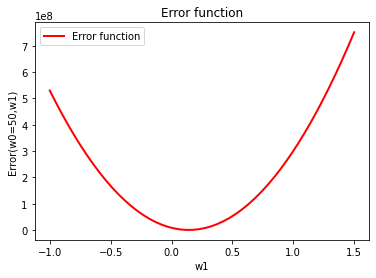

In [21]:
# vibo: построим график зависимости функции ошибки при зафиксированном свободном члене (w0=50)
w0 = 50
w1 = np.linspace(-1, 1.5, 50)
plt.plot(w1, sq_error(w0, w1), lw=2, color='red', label='Error function')
plt.title('Error function')
plt.legend()
plt.xlabel('w1')
plt.ylabel('Error(w0=50,w1)')

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [22]:
# vibo: найдем оптимальный параметр w1 (наклон прямой) при зафиксированном свободном члене (w0)
w0 = 50
w1 = np.linspace(-5, 5, 100)

def sq_error_w0_50(w1):
    return sq_error(w0, w1)

w1_opt = optimize.minimize_scalar(sq_error_w0_50)

# результат оптимизации забирает .x
w1_opt = w1_opt.x

print(w1_opt)

0.1410916511506286


In [23]:
# vibo: расчетное значение оптимального w1:
#w1_opt = 0.1410916511506286

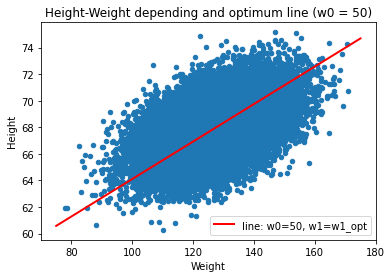

In [24]:
# vibo: строим линию с параметрами w0=50, w1_opt на облаке точек пространства признаков рост/вес
data.plot(y='Height', x='Weight', kind='scatter', title='Height-Weight depending and optimum line (w0 = 50)')

line_x = np.linspace(start=75, stop=175, num=50)
line_w1_opt_y = w0 + w1_opt * line_x

plt.plot(line_x, line_w1_opt_y, lw=2, color='red', label='line: w0=50, w1=w1_opt')
plt.legend()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [25]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

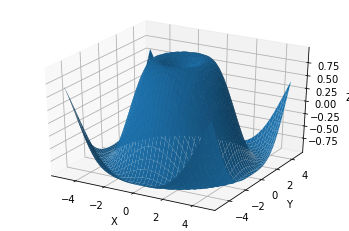

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

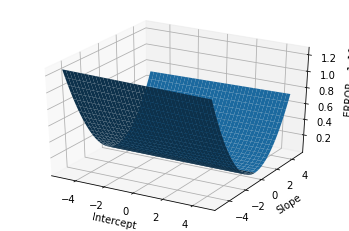

In [27]:
# vibo: построим 3D-график зависимости функции ошибки 
fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(w0, w1)

# вызываем функцию ошибки из п.9
Z = sq_error(X, Y)

surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('ERROR')
plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [28]:
# vibo: найдем отпимальные параметры w0 и w1
# vibo: создаем новую функцию для вычисления ошибки от параметра w, где w0 = w[0], w1 = w[1] 
def new_sq_error(w):
    n = len(data.index) # v: определяем число наблюдений в наборе данных
    summ_n = 0
    x = data['Weight']
    y = data['Height']
    for i in range(1,n):
        summ_n += (y[i] - (w[0] + w[1] * x[i]))**2
    return summ_n

w0_w1_opt = optimize.minimize(new_sq_error, x0=np.array([0,0]), method='L-BFGS-B', bounds=((-100,100),(-5, 5)))

# результат оптимизации забирает .x
w0_opt, w1_opt = w0_w1_opt.x

print('w0_opt=', w0_opt, '\nw1_opt=', w1_opt)

w0_opt= 57.571496512174754 
w1_opt= 0.08200834615398768


In [29]:
# vibo: расчетное значение оптимального w0 и w1 методом L-BFGS-B:
#w0_opt= 57.571496512174754 
#w1_opt= 0.08200834615398768

In [30]:
# vibo: первоисточник: https://ru.wikipedia.org
# Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно (BFGS) (англ. Broyden — Fletcher — Goldfarb — Shanno algorithm)
# — итерационный метод численной оптимизации, предназначенный для нахождения локального максимума/минимума
# нелинейного функционала без ограничений.
# BFGS — один из наиболее широко применяемых квазиньютоновских методов. В квазиньютоновских методах не вычисляется
# напрямую гессиан функции. Вместо этого гессиан оценивается приближенно, исходя из сделанных до этого шагов. 
# Также существуют модификация данного метода с ограниченным использованием памяти (L-BFGS), который предназначен 
# для решения нелинейных задач с большим количеством неизвестных, а также модификация с ограниченным использованием 
# памяти в многомерном кубе (L-BFGS-B).
# Данный метод находит минимум любой дважды непрерывно дифференцируемой выпуклой функции. Несмотря на эти 
# теоретические ограничения, как показывает опыт, BFGS хорошо справляется и с невыпуклыми функциями. 

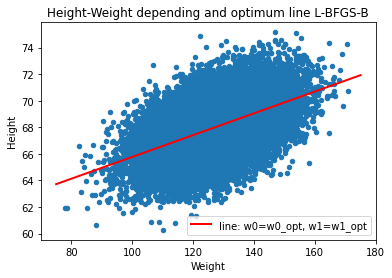

In [31]:
# vibo: строим линию с параметрами w0_opt, w1_opt на облаке точек пространства признаков рост/вес
data.plot(y='Height', x='Weight', kind='scatter', title='Height-Weight depending and optimum line L-BFGS-B')

line_x = np.linspace(start=75, stop=175, num=10)
line_w1_opt_y = w0_opt + w1_opt * line_x

plt.plot(line_x, line_w1_opt_y, lw=2, color='red', label='line: w0=w0_opt, w1=w1_opt')
plt.legend()

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)